# What are Diffusion Models? 
- The goal of generative modeling is to learn to generate data, such as images or audio, given a number of training examples. 
- A good generative model will create a diverse set of outputs that resemble the training data without being exact copies. 
- 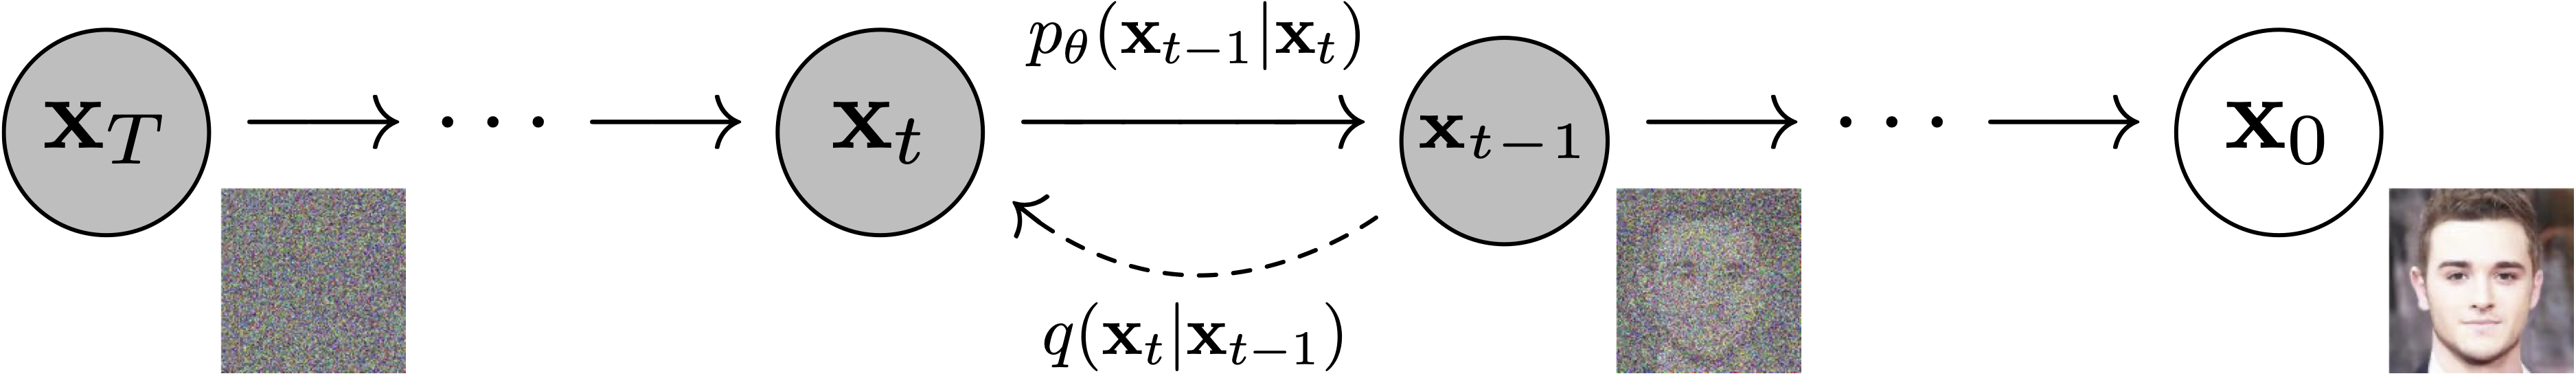

- The secret to diffusion models success is the iterative nature of the diffusion process. 
- Generating begins with random noise, but this is gradually refined over a number of steps until an output image emerges. 
- At each step, the model estimates how we could go from the current input to a completely denoised version. 
- However, since we only make a small change at every step, any errors in this estimate at the early stages (where predicting the final output is extremely difficult) can be corrrected in later updates. 

- Training the model is relatively straihtforward compared to some other types of generative models. 
1) Load in some images from the training data
2) Add noise, in different amounts. Remember, we want the model to do a good job estimating how to 'fix' (denoise) both extremely noisy images and images that are close to perfect. 
3) Feed the noisy versions of the inputs into the model 
4) Evaluate how well the model does at denoising these inputs 
5) Use this information to update the model weights. 

### Code Start 

In [ ]:
import numpy as np 
import torch 
import torch.nn.functional as F 
from matplotlib import pyplot as plt 
from PIL import Image 

def show_images(x): 
  """Given a batch of images x, make a grid and convert to PIL"""
  x = x * 0.5 + 0.5 # Map from (-1, 1) back to (0, 1)
  grid = torchvision.utils.make_grid(x)
  grid_im = grid.detach().cpu.permute(1, 2, 0).clip(0, 1) * 255 
  grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
  return grid_im

def make_grid(images, size=64):
  """Given a list of PIL images, stack them together into a line for easy viewing."""
  output_im = Image.new('RGB', (size * len(images), size))
  for i, im in enumerate(images):
      output_im.paste(im.resize((size, size)), (i * size, 0))
  return output_im  

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

- Dreambooth: 
    - DreamBooth is a training technique that updates the entire diffusion model by training on just a few images of a subject or style. It works by associating a special word in the prompt with the example images.
- Stable Diffusion: It's a powerful text-conditioned latent diffusion model. 
- Dreambooth let's us create our own model variant with some extra knowledge of a specific face, object or style. 
- The Corridor Crew made an excellent video using this to tell stories with consistent characters, which is a great example of what this technique can do:

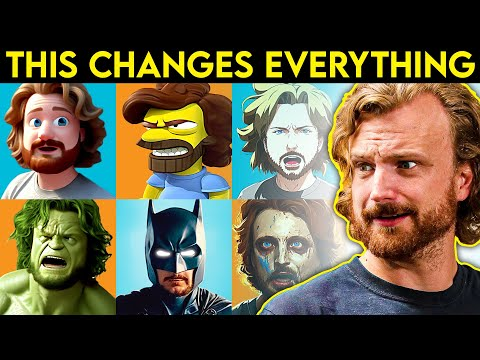

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("W4Mcuh38wyM")

- "Mr Potato Head" model: 
- First, we load the pipeline. This will download model weights etc. from the Hub. 

In [ ]:
from diffusers import StableDiffusionPipeline

# Check out https://huggingface.co/sd-dreambooth-library for loads of models from the community
model_id = "sd-dreambooth-library/mr-potato-head"

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)

- Once the pipeline has finished loading, we can generate images with: 

In [ ]:
prompt = "an abstract oil painting of sks mr potato head by picasso"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

- 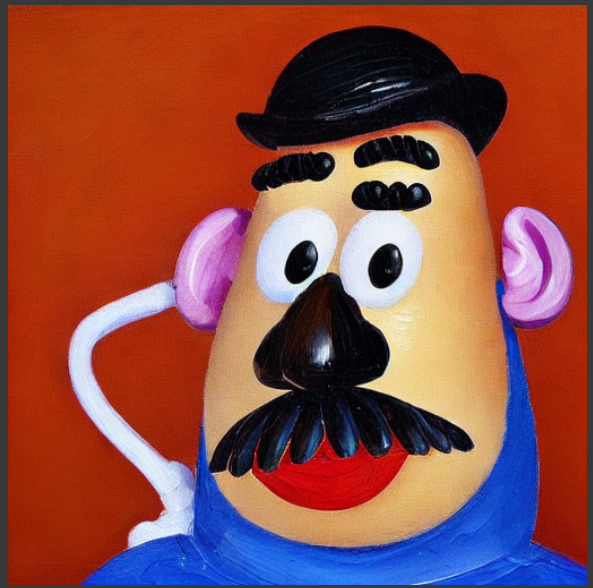

- guidance_scale: which determines how much the model will try to match the prompt 
    - A value of 0 gives random images and does not consider your prompt at all.
    - Lower values give more "creative" images, but with a lot of elements unrelated to your prompt (pulled from other unrelated images). Prompt itself may also be poorly represented.
    - Higher values give images which represent your prompt more precisely. However, results are less "creative" (less elements are pulled from images unrelated to your prompt), and with particularly high values you cat get some image artifacts.
    - Negative values, in theory, can also work - making images of everything but things in your prompt. I don't think it currently works with SD though.
    - With SD, optimal values are between 5-15, in my personal experience. Use lower values for creative outputs, and higher values if you want to get more usable, sharp images. 

- There's a lot going on in that magical pipeline! 
- By the end of the course you'll know how it all works. 
- Let's take a look at how we can train a diffusion model from scracth. 